## PHASE 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Import Data

MasterFile=pd.read_csv("MasterFileSimplifiedDataII_.csv")
MasterFile=MasterFile.iloc[:,1:]

In [106]:
MasterFile.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'RAPE',
       'KIDNAPPING AND ABDUCTION', 'DACOITY', 'ROBBERY', 'ARSON', 'HURT',
       'DOWRY DEATHS', 'BURGLARY', 'INSULT TO MODESTY OF WOMEN', 'RIOTS',
       'CHEATING', 'CAUSING DEATH BY NEGLIGENCE', 'THEFT',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'IMPORTATION OF GIRLS', 'CRUELTY BY HUSBAND OR RELATIVES',
       'BUYING OF GIRLS FOR PROSTITUTION', 'FOETICIDE',
       'PROCURATION OF MINOR GIRLS', 'EXPOSURE AND ABANDONMENT',
       'SELLING OF GIRLS FOR PROSTITUTION', 'ABETMENT OF SUICIDE',
       'CASES_PROPERTY_STOLEN', 'TOTAL IPC CRIMES', 'TOTAL', 'GRAND TOTAL',
       'POLICE_INJURED_TOTAL_POLICEMEN', 'POLICE_KILLED_TOTAL_POLICEMEN',
       'TOTAL - DACOITY', 'TOTAL - ROBBERY', 'TOTAL - BURGLARY',
       'TOTAL - THEFT', 'OTHERS_C', 'TOTAL_MF', 'POPULATION', 'AREA_KM2',
       'LITERACY_RATE'],
      dtype='object')

In [107]:
### add POPULATION BACK

In [108]:
Features=['MURDER', 'RAPE','KIDNAPPING AND ABDUCTION', 'ARSON', 'HURT','DOWRY DEATHS', 'INSULT TO MODESTY OF WOMEN', 'RIOTS','CHEATING', 'CAUSING DEATH BY NEGLIGENCE',
       'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','IMPORTATION OF GIRLS', 'CRUELTY BY HUSBAND OR RELATIVES',
       'BUYING OF GIRLS FOR PROSTITUTION', 'FOETICIDE','PROCURATION OF MINOR GIRLS', 'EXPOSURE AND ABANDONMENT',
       'SELLING OF GIRLS FOR PROSTITUTION', 'ABETMENT OF SUICIDE','CASES_PROPERTY_STOLEN','POLICE_INJURED_TOTAL_POLICEMEN', 'POLICE_KILLED_TOTAL_POLICEMEN',
       'TOTAL - DACOITY', 'TOTAL - ROBBERY', 'TOTAL - BURGLARY','TOTAL - THEFT', 'OTHERS_C','POPULATION','AREA_KM2', 'LITERACY_RATE']

FeaturesR=['CASES_PROPERTY_STOLEN','POLICE_INJURED_TOTAL_POLICEMEN', 'POLICE_KILLED_TOTAL_POLICEMEN',
       'TOTAL - DACOITY', 'TOTAL - ROBBERY', 'TOTAL - BURGLARY','TOTAL - THEFT', 'OTHERS_C','POPULATION','AREA_KM2', 'LITERACY_RATE']

In [109]:
# Create a subset DataFrame with features for analysis
data=MasterFile[Features].copy()

In [110]:
# Create a subset DataFrame with most relevant features for analysis
dataT=MasterFile[FeaturesR].copy()

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   MURDER                                               33396 non-null  float64
 1   RAPE                                                 33396 non-null  float64
 2   KIDNAPPING AND ABDUCTION                             33396 non-null  float64
 3   ARSON                                                33396 non-null  float64
 4   HURT                                                 33396 non-null  float64
 5   DOWRY DEATHS                                         33396 non-null  float64
 6   INSULT TO MODESTY OF WOMEN                           33396 non-null  float64
 7   RIOTS                                                33396 non-null  float64
 8   CHEATING                                             33396 non-nul

In [112]:
# Check new DataFrame
data.head()

,MURDER,RAPE,KIDNAPPING AND ABDUCTION,ARSON,HURT,DOWRY DEATHS,INSULT TO MODESTY OF WOMEN,RIOTS,CHEATING,CAUSING DEATH BY NEGLIGENCE,...,POLICE_INJURED_TOTAL_POLICEMEN,POLICE_KILLED_TOTAL_POLICEMEN,TOTAL - DACOITY,TOTAL - ROBBERY,TOTAL - BURGLARY,TOTAL - THEFT,OTHERS_C,POPULATION,AREA_KM2,LITERACY_RATE
0,101.0,50.0,46.0,30.0,22.285714,16.0,34.0,78.0,104.0,181.0,...,81.714286,20.0,214.0,629.0,7220.0,16751.0,23714.460991,75728400,162970,60.5
1,151.0,23.0,53.0,69.0,22.285714,7.0,24.0,168.0,65.0,270.0,...,81.714286,20.0,214.0,629.0,7220.0,16751.0,23413.460991,75728400,162970,60.5
2,101.0,27.0,59.0,38.0,22.285714,14.0,83.0,156.0,209.0,404.0,...,81.714286,20.0,214.0,629.0,7220.0,16751.0,24422.460991,75728400,162970,60.5
3,80.0,20.0,25.0,23.0,22.285714,17.0,38.0,164.0,37.0,233.0,...,81.714286,20.0,214.0,629.0,7220.0,16751.0,23015.460991,75728400,162970,60.5
4,82.0,23.0,49.0,41.0,22.285714,12.0,58.0,70.0,220.0,431.0,...,81.714286,20.0,214.0,629.0,7220.0,16751.0,24649.460991,75728400,162970,60.5


In [113]:
# Check DataFrame with relevant features
dataT.head()

,CASES_PROPERTY_STOLEN,POLICE_INJURED_TOTAL_POLICEMEN,POLICE_KILLED_TOTAL_POLICEMEN,TOTAL - DACOITY,TOTAL - ROBBERY,TOTAL - BURGLARY,TOTAL - THEFT,OTHERS_C,POPULATION,AREA_KM2,LITERACY_RATE
0,4126.538462,81.714286,20.0,214.0,629.0,7220.0,16751.0,23714.460991,75728400,162970,60.5
1,4126.538462,81.714286,20.0,214.0,629.0,7220.0,16751.0,23413.460991,75728400,162970,60.5
2,4126.538462,81.714286,20.0,214.0,629.0,7220.0,16751.0,24422.460991,75728400,162970,60.5
3,4126.538462,81.714286,20.0,214.0,629.0,7220.0,16751.0,23015.460991,75728400,162970,60.5
4,4126.538462,81.714286,20.0,214.0,629.0,7220.0,16751.0,24649.460991,75728400,162970,60.5


In [114]:
# Check data types
dataT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CASES_PROPERTY_STOLEN           33396 non-null  float64
 1   POLICE_INJURED_TOTAL_POLICEMEN  33396 non-null  float64
 2   POLICE_KILLED_TOTAL_POLICEMEN   33396 non-null  float64
 3   TOTAL - DACOITY                 33396 non-null  float64
 4   TOTAL - ROBBERY                 33396 non-null  float64
 5   TOTAL - BURGLARY                33396 non-null  float64
 6   TOTAL - THEFT                   33396 non-null  float64
 7   OTHERS_C                        33396 non-null  float64
 8   POPULATION                      33396 non-null  int64  
 9   AREA_KM2                        33396 non-null  int64  
 10  LITERACY_RATE                   33396 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.8 MB


The feature "POPULATION" is not numeric; thus, it will be converted to integer.

In [119]:
## Scale the data
## Numbers should be between 0 and 10

data=((data-data.min())/(data.max()-data.min()))*9+1
dataT=((dataT-dataT.min())/(dataT.max()-dataT.min()))*9+1
#scaler=StandardScaler()
#data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [120]:
# Data description - to get an overview of numerical data
dataT.describe()

,CASES_PROPERTY_STOLEN,POLICE_INJURED_TOTAL_POLICEMEN,POLICE_KILLED_TOTAL_POLICEMEN,TOTAL - DACOITY,TOTAL - ROBBERY,TOTAL - BURGLARY,TOTAL - THEFT,OTHERS_C,POPULATION,AREA_KM2,LITERACY_RATE
count,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000,33396.000000
mean,1.399001,1.136246,1.656833,2.796545,3.445890,3.519693,3.339421,2.268779,3.714198,5.125767,5.086699
std,0.406418,0.239336,0.633062,1.893557,2.116616,2.354513,2.123797,0.840400,2.253950,2.666376,1.582937
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.106263,1.016523,1.203008,1.525398,1.786290,1.736245,1.702768,1.617118,2.114755,2.622798,4.078947
50%,1.334563,1.060873,1.456767,2.255497,2.773387,2.881877,3.113587,2.117155,3.702683,4.945350,5.006579
75%,1.551688,1.164356,1.930451,3.176649,4.815323,4.227860,4.476521,2.692878,5.271138,6.728526,5.993421
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


After scaling the data, it is possible to see that it is on a 1 to 10 scale. There are no negative data and minimum values is not zero.

In this way, this procedure ensures that all features are treated under the same parameters. None of them will dominate the others in the cluster. However, we still preserve the variance in the original data.

### Initialize random centroids

In [121]:
# Create a function to initialize centroids
# It selects a random value from each column

centroids=[]

def random_centroids (data,k):
    for i in range (k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

In [122]:
# Generate centroids
centroids=random_centroids(dataT,3)
centroids

,0,1,2
CASES_PROPERTY_STOLEN,1.020298,1.042270,1.699852
POLICE_INJURED_TOTAL_POLICEMEN,1.033915,1.006957,1.025219
POLICE_KILLED_TOTAL_POLICEMEN,1.456767,1.456767,1.507519
TOTAL - DACOITY,2.030326,3.299469,4.227445
TOTAL - ROBBERY,1.179032,3.765323,3.046774
TOTAL - BURGLARY,9.161680,3.227739,9.667169
TOTAL - THEFT,3.437706,4.981103,1.433010
OTHERS_C,1.318984,2.445622,1.416989
POPULATION,1.050349,5.497396,5.406875
AREA_KM2,2.288051,2.618855,5.544541


https://www.youtube.com/watch?v=iNlZ3IU5Ffw
https://www.youtube.com/watch?v=lX-3nGHDhQg

### Label each data point

In [123]:
# Creata a function to:
# Calculate the Euclidean distance between each data point and each cluster center
# Find the minimum value in each row
def get_labels(data,centroids):
    distances= centroids.apply(lambda x: np.sqrt(((data-x)**2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [124]:
# Define labels variable

labels=get_labels(dataT,centroids)
labels

0        1
1        1
2        1
3        1
4        1
        ..
33391    1
33392    1
33393    1
33394    1
33395    1
Length: 33396, dtype: int64

In [151]:
# Check how many are in each cluster
labels.value_counts()

2    17242
0     9465
1     6689
dtype: int64

In [170]:
labels.unique()

array([2, 0, 1], dtype=int64)

Freedman–Diaconis number of bins: 5


(array([ 9465.,     0.,  6689.,     0., 17242.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

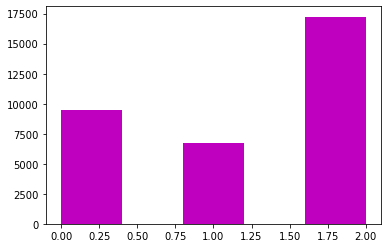

In [198]:
q25, q75 = np.percentile(labels, [25, 75])
bin_width = 7 * (q75 - q25) * len(labels) ** (-1/3)
bins = round((labels.max() - labels.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x=labels, bins=bins, color="m")

In the first dataset, which contained all crimes, there were:
- 19166 Districts in Cluster 0
- 12585 Districts in Cluster 1
- 1645 Districts in Cluster 2

In the new dataset, which includes only relevant features, there are:
- 9465 Districts in Cluster 0
- 6689 Districts in Cluster 1
- 17242 Districts in Cluster 2

In [126]:
## Define a new function to Update Centroids
## Geometric mean per feature (the geometric mean of each feature in the Euclidean Space, which is the cluster centroid)
## T to transpose

def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

In [127]:
## Repeat the last 2 steps (label each data point and Update centroids) until centroids stop changing

In [128]:
## Plot the clusters

In [129]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

In [159]:
# Define a function to plot the clusters

def plot_clusters(data,labels,centroids,iteration):
    pca=PCA(n_components=2)
    data_2d=pca.fit_transform(data)
    centroids_3d=pca.fit_transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1],c=labels,figsize=(10,10))
    plt.scatter(x=centroids_3d[:,0],y=centroids_3d[:,1])
    plt.show()

In [131]:
# Create a function to initialize centroids
# It selects a random value from each column

centroids=[]

def random_centroids (data,k):
    for i in range (k):
        centroid=data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)

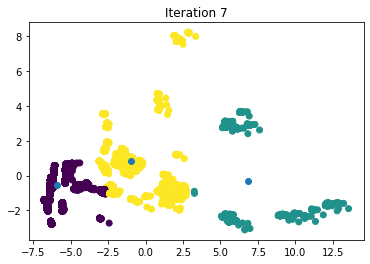

In [132]:
max_iterations=100
k=3
centroids=random_centroids(dataT,k)
old_centroids=pd.DataFrame()
iteration=1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids=centroids
    
    labels=get_labels(dataT,centroids)
    centroids=new_centroids(dataT,labels,k)
    plot_clusters(dataT,labels,centroids,iteration)
    iteration+=1

In [133]:
centroids

,0,1,2
CASES_PROPERTY_STOLEN,1.072552,1.857384,1.362561
POLICE_INJURED_TOTAL_POLICEMEN,1.062884,1.255637,1.104381
POLICE_KILLED_TOTAL_POLICEMEN,1.292246,2.303125,1.482705
TOTAL - DACOITY,1.192659,3.410854,2.919247
TOTAL - ROBBERY,1.262121,6.347344,3.219833
TOTAL - BURGLARY,1.464528,6.521981,3.003875
TOTAL - THEFT,1.299871,6.129770,3.046598
OTHERS_C,1.447987,3.364162,2.211857
POPULATION,1.381875,6.421260,3.595464
AREA_KM2,2.134055,9.334481,4.888393


In [134]:
MasterFile[labels==0][['DISTRICT']+FeaturesR]

,DISTRICT,CASES_PROPERTY_STOLEN,POLICE_INJURED_TOTAL_POLICEMEN,POLICE_KILLED_TOTAL_POLICEMEN,TOTAL - DACOITY,TOTAL - ROBBERY,TOTAL - BURGLARY,TOTAL - THEFT,OTHERS_C,POPULATION,AREA_KM2,LITERACY_RATE
29,CHANGLANG,135.461538,2.0,0.285714,22.0,84.0,248.0,443.0,779.842292,1098328,83743,54.3
30,DIBANG VALLEY,135.461538,2.0,0.285714,22.0,84.0,248.0,443.0,767.842292,1098328,83743,54.3
31,KAMENG EAST,135.461538,2.0,0.285714,22.0,84.0,248.0,443.0,753.842292,1098328,83743,54.3
32,KAMENG WEST,135.461538,2.0,0.285714,22.0,84.0,248.0,443.0,747.842292,1098328,83743,54.3
33,LOHIT,135.461538,2.0,0.285714,22.0,84.0,248.0,443.0,777.842292,1098328,83743,54.3
...,...,...,...,...,...,...,...,...,...,...,...,...
33255,PHEK,152.615385,0.0,0.000000,3.0,63.0,62.0,397.0,465.023504,1981337,16579,74.8
33256,TUENSANG,152.615385,0.0,0.000000,3.0,63.0,62.0,397.0,464.023504,1981337,16579,74.8
33257,WOKHA,152.615385,0.0,0.000000,3.0,63.0,62.0,397.0,464.023504,1981337,16579,74.8
33258,ZUNHEBOTO,152.615385,0.0,0.000000,3.0,63.0,62.0,397.0,464.023504,1981337,16579,74.8


In [145]:
# Checking Districts and States in Cluster 0.
CLSTR0=MasterFile[labels==0][['DISTRICT','STATE/UT']]

In [152]:
# Check Cluster 0 dataframe dimensions
CLSTR0.shape

(9465, 2)

There are 9465 Districts in Cluster 0, which are located in the States below:

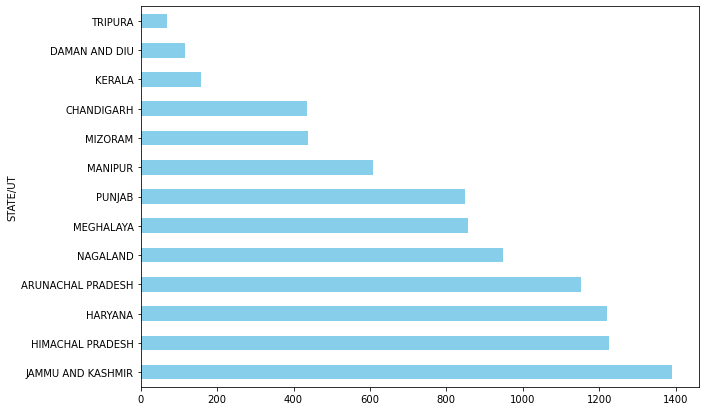

In [148]:
# Check which are the States per Districts count in Cluster 0

fig,ax =plt.subplots(figsize=(10,7))
grouped=CLSTR0[['STATE/UT','DISTRICT']].groupby('STATE/UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

28% of Districts, just 8 points above Districts in Sensitive areas, can be classified as peaceful areas. Mainly because, they have the least amount of crime record, which could be explained because these Districts are smaller than the Districts in other clusters but also, because they have a high literacy rate.

In [153]:
# Checking Districts and States in Cluster 1.
CLSTR1=MasterFile[labels==1][['DISTRICT','STATE/UT']]

In [154]:
# Check Cluster 1 dataframe dimensions
CLSTR1.shape

(6689, 2)

There are 6689 Districts in Cluster 1, which are located in the States below:

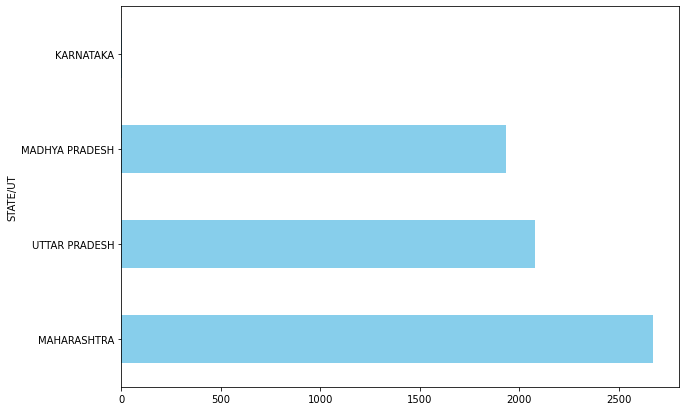

In [155]:
# Check which are the States per Districts count in Cluster 1

fig,ax =plt.subplots(figsize=(10,7))
grouped=CLSTR1[['STATE/UT','DISTRICT']].groupby('STATE/UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

- The data shows that 20% of the Districts in the dataset are sensitive, given that high number of crimes have been registered, which can be explained by a large population and area per km2, where certain areas may have been unattended.

- Most of this districts belong to MAHARASHTRA State, UTTAR PRADESH and MADHYA PRADESH.


In [156]:
# Checking Districts and States in Cluster 2.
CLSTR2=MasterFile[labels==2][['DISTRICT','STATE/UT']]

In [157]:
# Check Cluster 2 dataframe dimensions
CLSTR2.shape

(17242, 2)

There are 17242 Districts in Cluster 2, which are located in the States below:

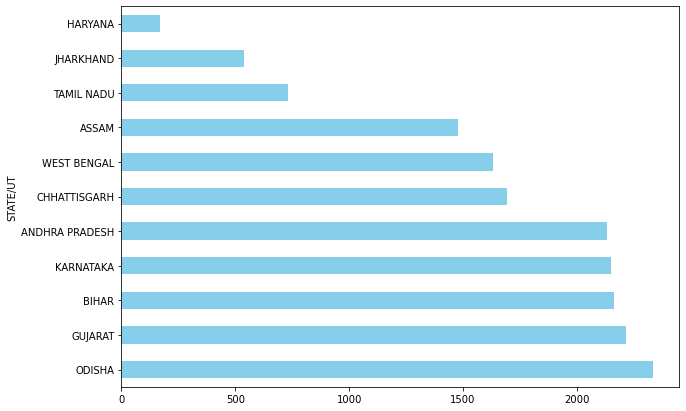

In [158]:
# Check which are the States per Districts count in Cluster 2

fig,ax =plt.subplots(figsize=(10,7))
grouped=CLSTR2[['STATE/UT','DISTRICT']].groupby('STATE/UT').size(). \
sort_values(ascending=False).plot(kind='barh',ax=ax,color="skyblue")

- 52% of the Districts in the dataset can be classified as Moderate, given that a moderate number of crimes have been registered in comparison to the Districts in the other clusters. However, these Districts have a low literacy rate.
 
- Most of this districts belong to the States shown in the graph above.


In [135]:
from sklearn.cluster import KMeans

In [136]:
kmeans=KMeans(3)
kmeans.fit(dataT)

KMeans(n_clusters=3)

In [137]:
centroids=kmeans.cluster_centers_

In [138]:
# Store data in a DataFrame

pd.DataFrame(centroids,columns=FeaturesR).T

,0,1,2
CASES_PROPERTY_STOLEN,1.114921,1.906598,1.413241
POLICE_INJURED_TOTAL_POLICEMEN,1.073501,1.271565,1.128352
POLICE_KILLED_TOTAL_POLICEMEN,1.412157,2.392918,1.526902
TOTAL - DACOITY,1.548377,3.740889,3.470864
TOTAL - ROBBERY,1.532448,6.474200,3.727654
TOTAL - BURGLARY,1.887971,7.015629,3.325389
TOTAL - THEFT,1.553303,6.430527,3.476696
OTHERS_C,1.557786,3.440438,2.351400
POPULATION,1.647594,6.787147,4.112600
AREA_KM2,2.713322,9.381777,5.272659
